In [1]:
from skopt import BayesSearchCV
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams


In [2]:
df = pd.read_csv("indian_liver_patient.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      580 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            582 non-null    float64
 4   Alkaline_Phosphotase        581 non-null    float64
 5   Alamine_Aminotransferase    581 non-null    float64
 6   Aspartate_Aminotransferase  580 non-null    float64
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     582 non-null    float64
 9   Albumin_and_Globulin_Ratio  578 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 50.2+ KB


In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [5]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,582.000000,581.000000,581.000000,580.000000,583.000000,582.000000,578.000000,583.000000
mean,44.746141,3.298799,1.488144,290.254733,80.542169,110.156897,6.483190,3.141753,0.946972,1.286449
std,16.189833,6.209522,2.810482,242.925760,182.835984,289.641517,1.085451,0.796199,0.319861,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
df.isnull().sum()

Age                           0
Gender                        3
Total_Bilirubin               0
Direct_Bilirubin              1
Alkaline_Phosphotase          2
Alamine_Aminotransferase      2
Aspartate_Aminotransferase    3
Total_Protiens                0
Albumin                       1
Albumin_and_Globulin_Ratio    5
Dataset                       0
dtype: int64

In [7]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)

In [8]:
df["Gender"].isnull().sum()

0

no of males : 442
no of females: 140


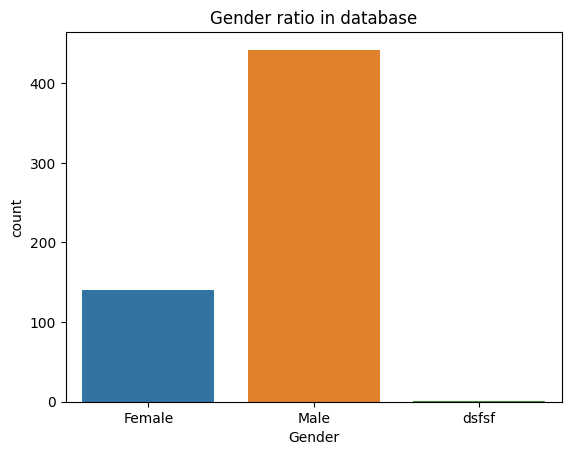

In [9]:
#countplot for gender attribute
sns.countplot(x="Gender",label="count",data=df)
plt.title("Gender ratio in database")

male,female,unexpected_value = df["Gender"].value_counts()
print("no of males :",male)
print("no of females:",female)


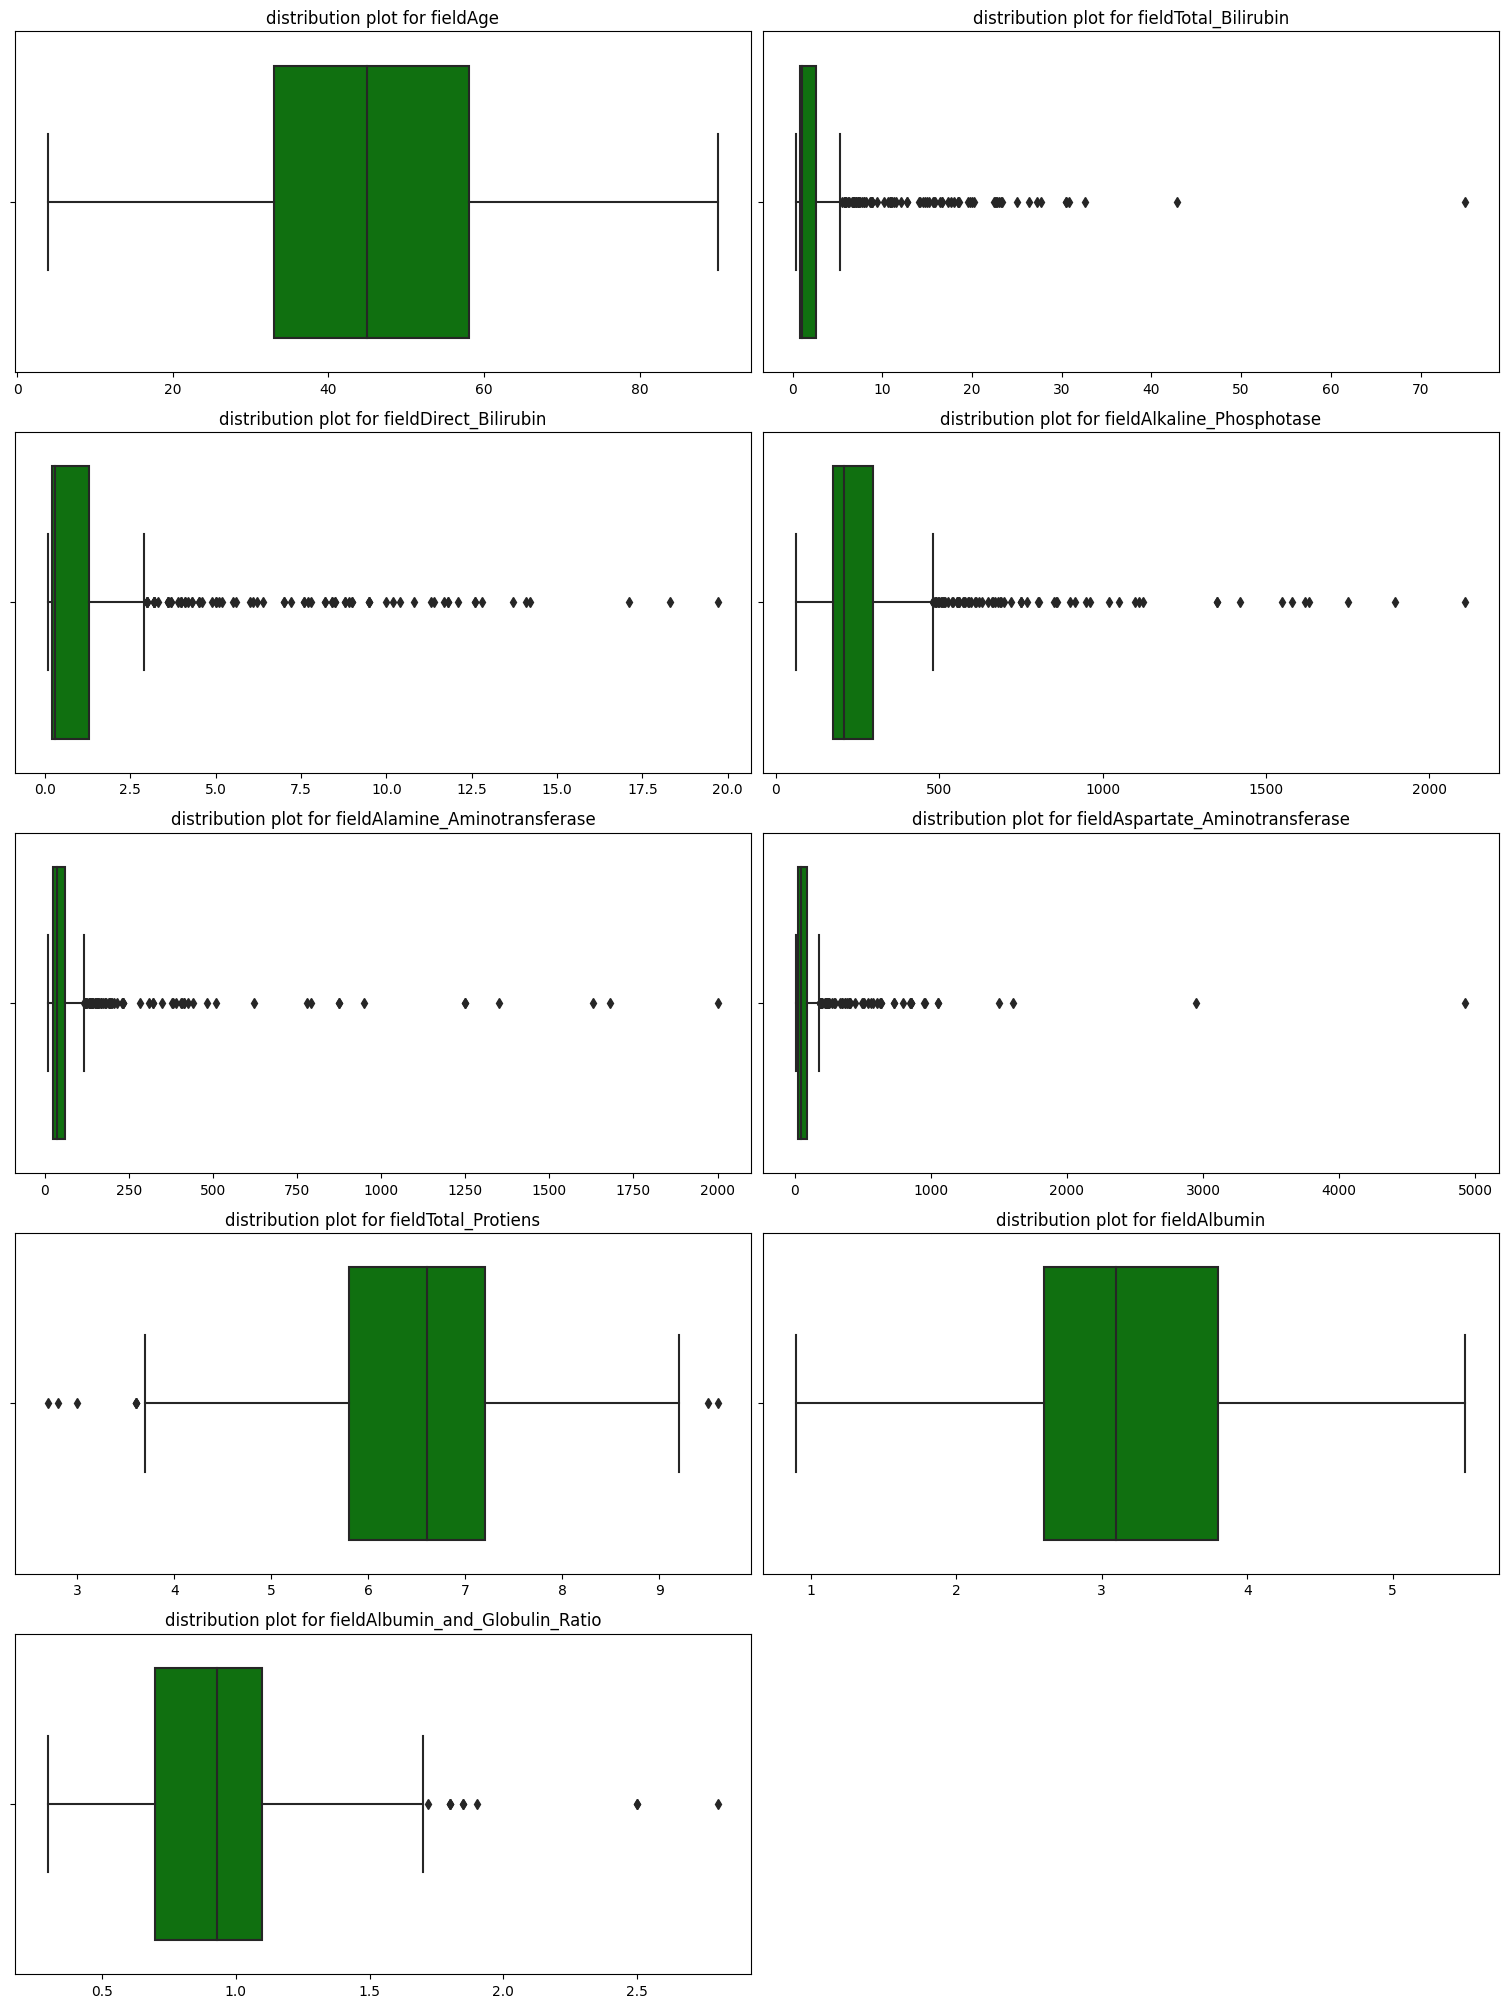

In [10]:
#box plots for all attributes
plt.figure(figsize=(15,20))
for i,c in enumerate(df.drop("Dataset",axis=1).select_dtypes(include="number").columns):
    plt.subplot(5,2,i+1)
    sns.boxplot(x=df[c],color="green")
    plt.title("distribution plot for field"+ c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=1.0)
    

ValueError: num must be an integer with 1 <= num <= 10, not 11

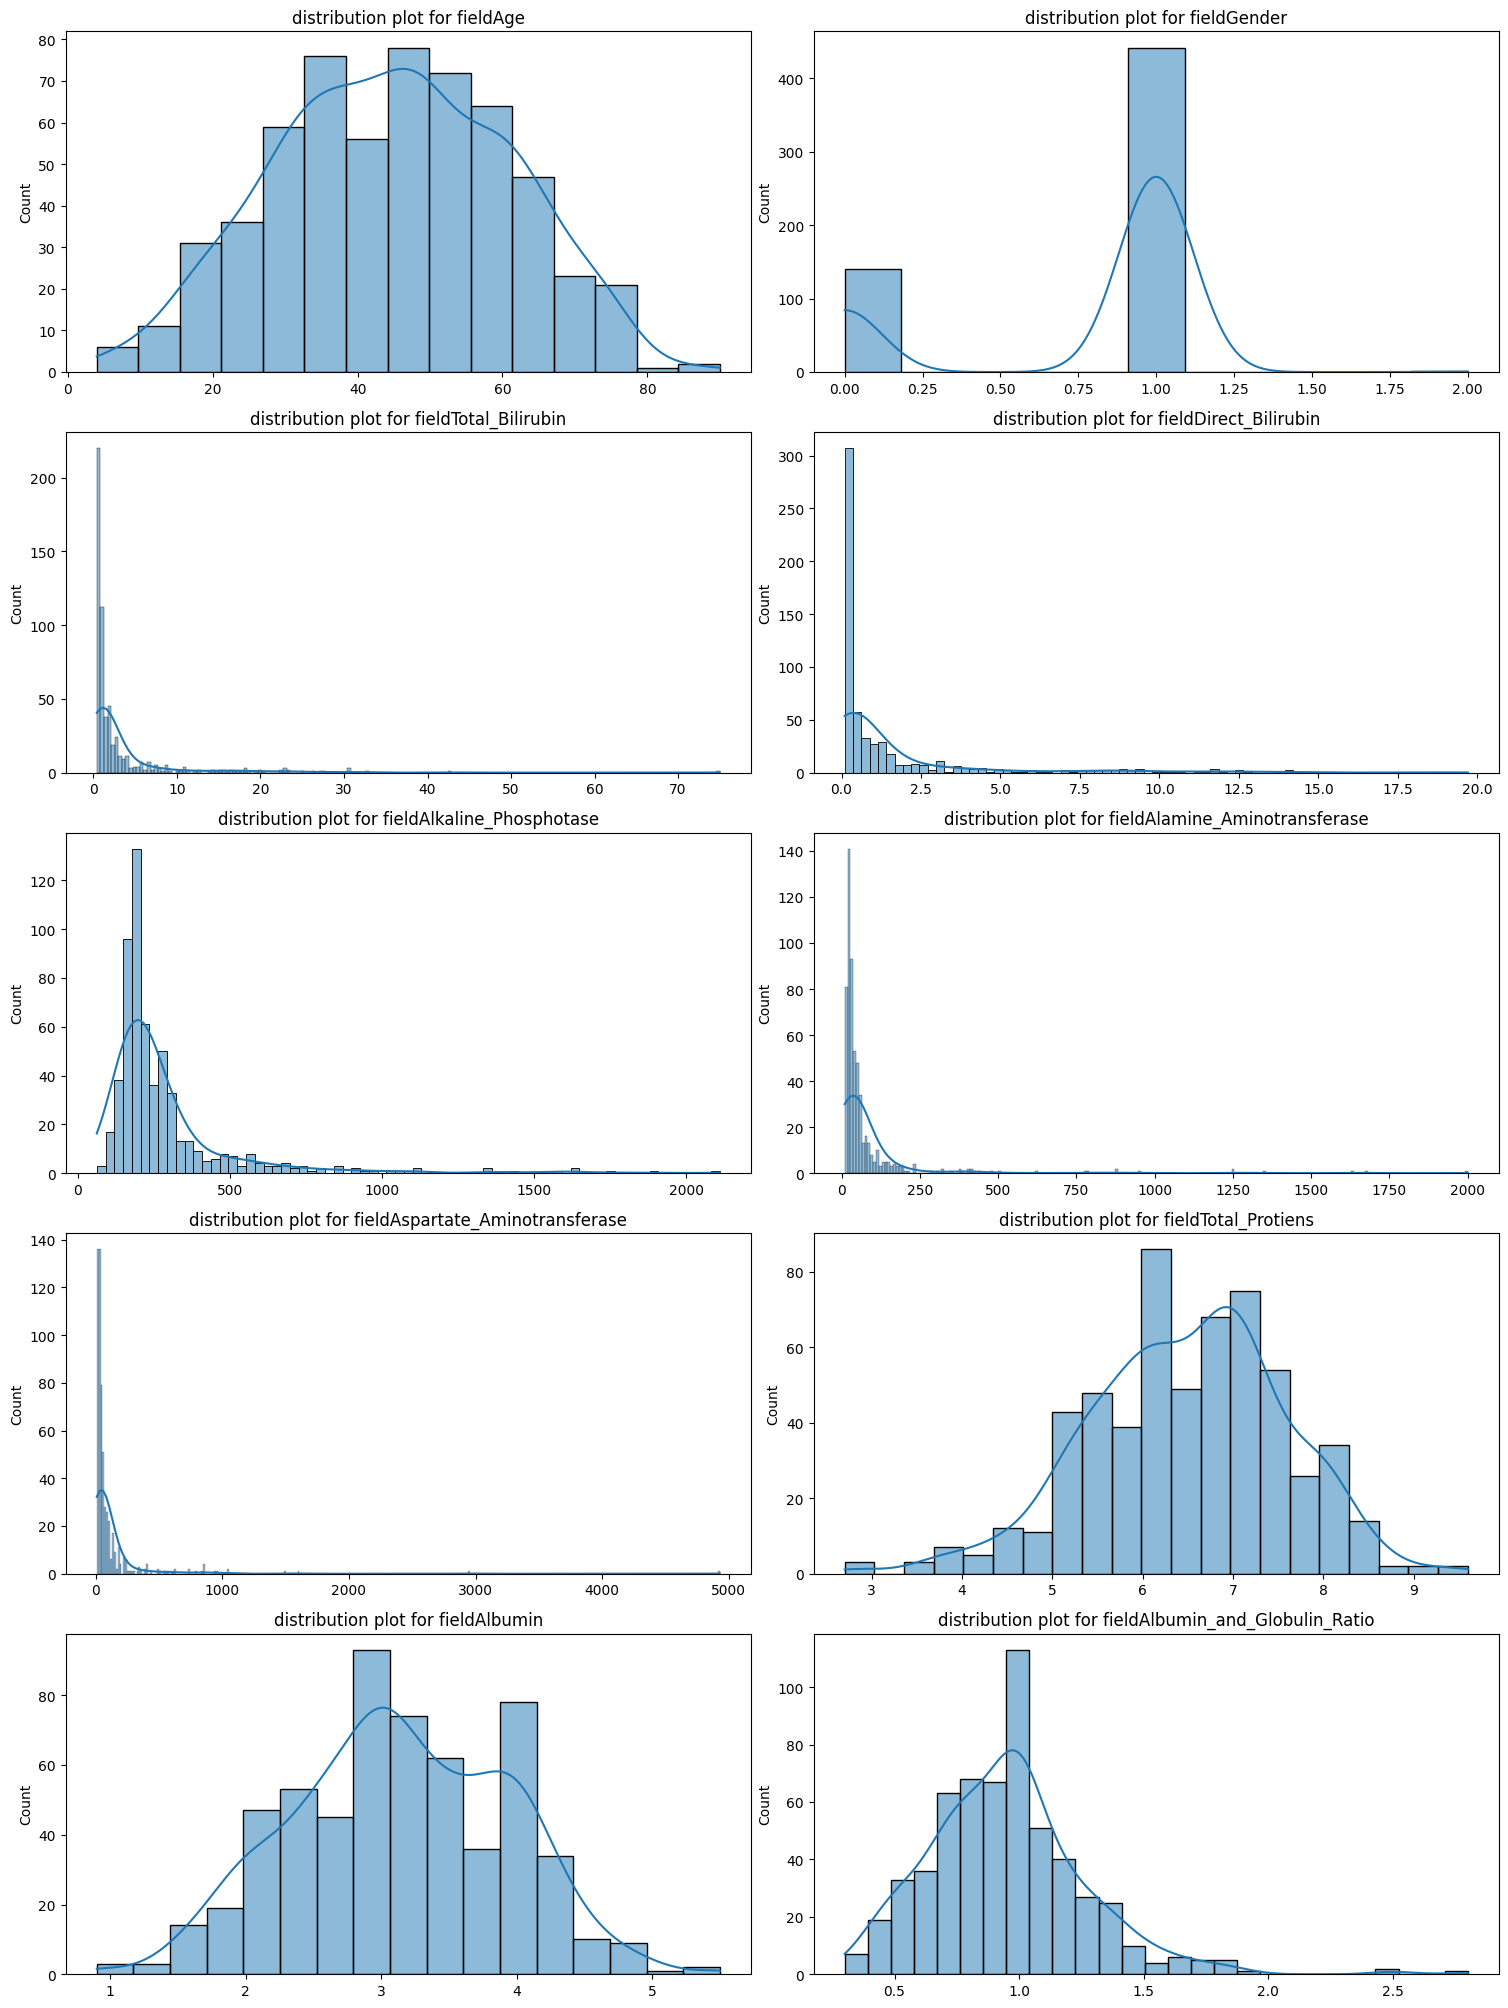

In [38]:
#Distribution plots for all attributes
plt.figure(figsize=(15,20))
for i,c in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(5,2,i+1)
    sns.histplot(x=df[c],kde=True)
    plt.title("distribution plot for field"+ c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=1.0)
    

<Axes: >

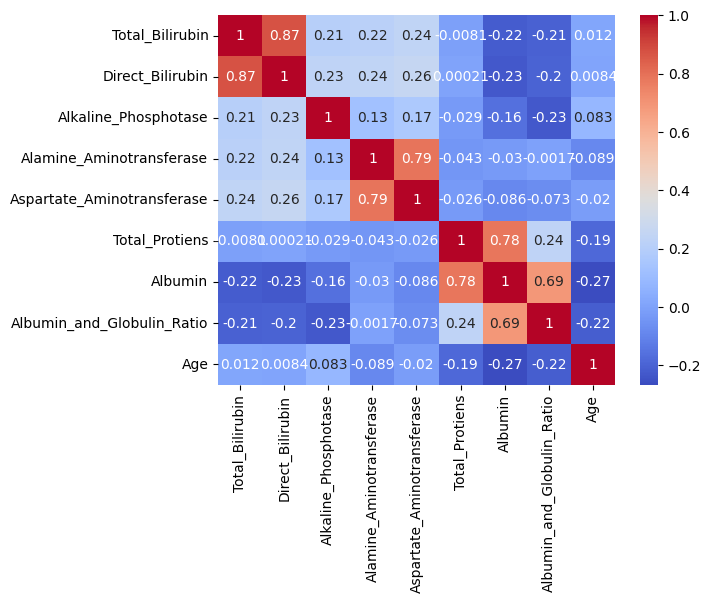

In [12]:
#plotting heatmap to check correlation between all attributes
df_cts=df.iloc[:,2:10]
df_cts["Age"]=df["Age"]
sns.heatmap(df_cts.corr(),cmap="coolwarm",annot=True)

<Axes: xlabel='Direct_Bilirubin', ylabel='Total_Bilirubin'>

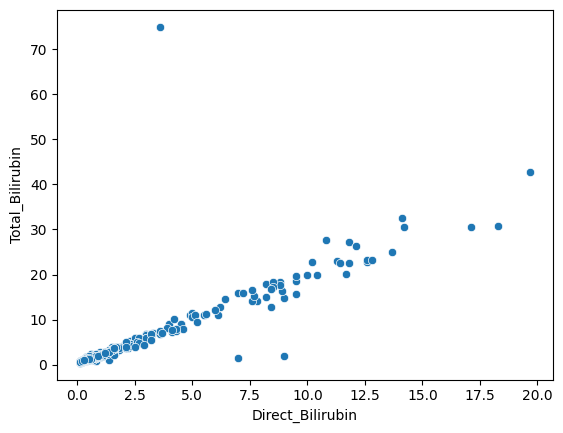

In [13]:
sns.scatterplot(x="Direct_Bilirubin",y="Total_Bilirubin",data=df)

<Axes: xlabel='Alamine_Aminotransferase', ylabel='Aspartate_Aminotransferase'>

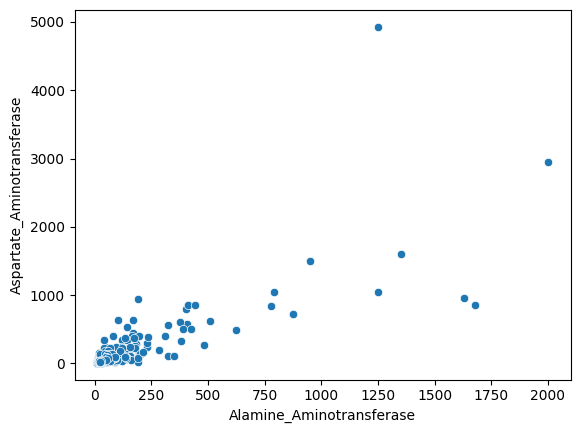

In [14]:
sns.scatterplot(x="Alamine_Aminotransferase",y="Aspartate_Aminotransferase",data=df)

<Axes: xlabel='Total_Protiens', ylabel='Albumin'>

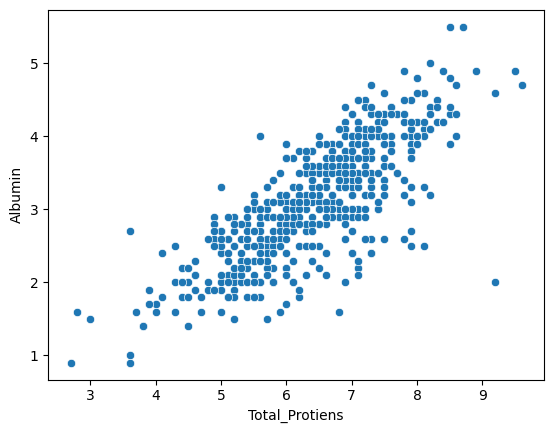

In [15]:
sns.scatterplot(x="Total_Protiens",y="Albumin",data=df)

<Axes: xlabel='Albumin_and_Globulin_Ratio', ylabel='Albumin'>

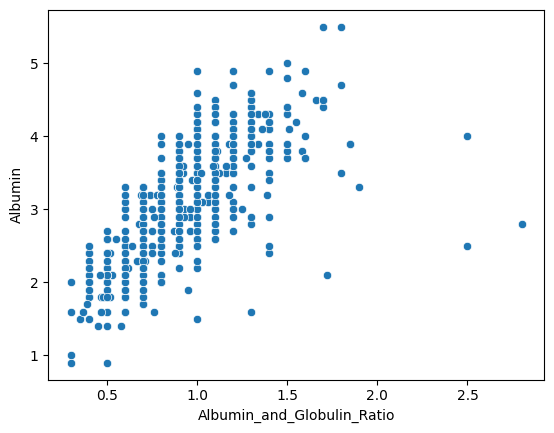

In [16]:
sns.scatterplot(x="Albumin_and_Globulin_Ratio",y="Albumin",data=df)

In [17]:
#predicting value of Albumin from its correlated column Total_Proteins

na_ids=df["Albumin"][df["Albumin"].isnull()].index.tolist()


In [18]:

x=df["Total_Protiens"].values.reshape((-1,1))
x=np.delete(x,na_ids)
x=x.reshape((-1,1))
y=df["Albumin"].values.reshape((-1,1))
y=np.delete(y,na_ids)
y=y.reshape((-1,1))


In [19]:
from sklearn.linear_model import LinearRegression

lml=LinearRegression()
lml.fit(x,y)
Alb_pred_nas=lml.predict(df["Total_Protiens"].values.reshape((-1,1))[na_ids])
df["Albumin"][na_ids]=Alb_pred_nas.reshape((-1,))



/tmp/ipykernel_10030/1339140296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Albumin"][na_ids]=Alb_pred_nas.reshape((-1,))


In [20]:
#predicting value of Albumin from its correlated column Total_Proteins

na_ids01=df["Albumin_and_Globulin_Ratio"][df["Albumin_and_Globulin_Ratio"].isnull()].index.tolist()

In [21]:

x1=df["Albumin"].values.reshape((-1,1))
x1=np.delete(x1,na_ids01)
x1=x1.reshape((-1,1))
y1=df["Albumin_and_Globulin_Ratio"].values.reshape((-1,1))
y1=np.delete(y1,na_ids01)
y1=y1.reshape((-1,1))

In [22]:

lml.fit(x1,y1)
Alb_Ratio_pred_nas=lml.predict(df["Albumin"].values.reshape((-1,1))[na_ids01])
df["Albumin_and_Globulin_Ratio"][na_ids01]=Alb_Ratio_pred_nas.reshape((-1,))


/tmp/ipykernel_10030/2533603815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Albumin_and_Globulin_Ratio"][na_ids01]=Alb_Ratio_pred_nas.reshape((-1,))


In [23]:
#filling remaining columns values with mean method

cols=["Direct_Bilirubin","Alkaline_Phosphotase","Alamine_Aminotransferase","Aspartate_Aminotransferase"]
for columns in cols:
    df[columns].fillna(df[columns].mean(),inplace=True)

In [24]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [25]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [26]:
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler




In [27]:
# using label encoder we converted gender column to numeric values
label_encoder = LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])



In [28]:
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV, GridSearchCV

from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score

from sklearn.tree import DecisionTreeClassifier

In [29]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
  
# Splitting the dataset into the Training set and Test set  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)  
  
# Normalize the selected columns

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)


In [30]:
# using bernoili naive bayes algorithm
clf = BernoulliNB()  

cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)
print("Cross-Validation Scores:", cv_scores)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_pred, y_test, average="weighted"))

Cross-Validation Scores: [0.70212766 0.67741935 0.70967742 0.72043011 0.69892473]
Accuracy:  0.7521367521367521
F1 Score:  0.8503682697231083


In [31]:
# using DecisionTree Algorithm
classifier= DecisionTreeClassifier(criterion='entropy', random_state=100)  

classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [32]:
y_pred= classifier.predict(X_test) 

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_pred, y_test, average="weighted"))
print("Confusion Matrix: \n", confusion_matrix(y_pred, y_test))

Accuracy:  0.7094017094017094
F1 Score:  0.7094017094017094
Confusion Matrix: 
 [[70 17]
 [17 13]]


In [33]:
# 5 fold cross validation for BernoiliNB
classifier= DecisionTreeClassifier(criterion='entropy', random_state=100)  
dt_cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test) 


In [34]:
print("Cross-Validation Scores:", dt_cv_scores.mean())


Cross-Validation Scores: 0.6287119652253488


In [35]:
# Hyperparameter optimization

parameter = {'max_leaf_nodes' : list(range(2,10)),
             'min_samples_split' : [2,3,4]}

random_search_CV = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                                      parameter,
                                      verbose =1,
                                      cv=3)
random_search_CV.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9],
                                        'min_samples_split': [2, 3, 4]},
                   verbose=1)

In [36]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              parameter,
                              verbose=1,
                              cv=3)
grid_search_cv.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [37]:
pred_grid_search = grid_search_cv.predict(X_test)
accuracy_score(pred_grid_search,y_test)

0.7435897435897436